# Project: Wrangling and Analyze Data

### Introlduction
In this project, we will do the different steps of data wrangling by gathering assessing and cleaning data. Data is extracted from twitter page WeRateDogs, which give score on different types of dogs according to a large audiancs. Firstly, we will gather data using different resourses : 
1. Data from csv file
2. Data from tsv file
3. Web scrapping from Twitter
Secondly, we assess the data quality and tidiness of the data using visualizations and functions. Finally, we clean the datasets using advanced functions to make data ready for the analysis. 

In [1]:
# Import statements for packages used in project
import numpy as np
import pandas as pd
import json
import requests
import tweepy
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import datetime

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [149]:
twit_archive = pd.read_csv('twitter-archive-enhanced.csv', dtype={'rating_numerator': np.float64})
twit_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [154]:
path = 'XXXX'
folder = 'Twit_project'
def create_folder(path : str, folder : str):
    fullpath = path + '/' + folder
    Existornot = os.path.exists(fullpath)
    if not Existornot:
        os.makedirs(fullpath)
    print("The new directory is created!")

In [155]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
twit_images = requests.get(url,allow_redirects=True )
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(twit_images.content)
images_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [156]:
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [157]:
consumer_key = 'XXXXXX'
consumer_secret = 'XXXXXX'
access_token = 'XXXXXXX'
access_token_secret = 'XXXXXXX'


In [158]:
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)

In [159]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweets = api.get_status("ukraine", tweet_mode="extended")

In [42]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
## function to return a datframe from json file 
from collections import defaultdict


def extract_from_json(file : str, columns : list) -> pd:
    tweets_scrapped = defaultdict(list)
    list_data = []
    with open(file) as json_file:
        for line in json_file:
            data = json.loads(line)
            for i in range(0, len(columns)):
                tweets_scrapped[columns[i]].append(data[columns[i]]) 
    df_scrapped = pd.DataFrame(tweets_scrapped, columns= columns)
    return df_scrapped

In [161]:
df_scrapped = extract_from_json('tweet-json.txt', ['id',
                                           'retweet_count',
                                           'favorite_count'])

In [162]:
df_scrapped.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


Now, it is the time to detect the quality of the data and assess the tidiness of its presentation. This step is necessary to make the necessary steps for the followig analysis. 

### Visual Assessement

In [163]:
twit_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
816,770787852854652928,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10.0,10,Winston,None,None,None,None
2021,672082170312290304,NaN,NaN,2015-12-02 15:57:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Patch. He wants to be a Christmas tree...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672082170...,11.0,10,Patch,None,None,None,None
469,816829038950027264,NaN,NaN,2017-01-05 02:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Betty. She's assisting ...,7.909461e+17,4.196984e+09,2016-10-25 16:00:09 +0000,https://twitter.com/dog_rates/status/790946055...,12.0,10,Betty,None,None,None,puppo
181,857029823797047296,NaN,NaN,2017-04-26 00:33:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He performs group cheeky wink tu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857029823...,12.0,10,Zeke,None,None,None,None
940,753026973505581056,NaN,NaN,2016-07-13 00:43:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tayzie. She's a Barbadian Bugaboo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753026973...,10.0,10,Tayzie,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14.0,10,None,None,None,None,None
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228...,11.0,10,Banjo,None,None,pupper,None
670,789986466051088384,NaN,NaN,2016-10-23 00:27:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Happy. He's a bathtub reviewer. Seems ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789986466...,12.0,10,Happy,None,None,None,None
1933,674019345211760640,NaN,NaN,2015-12-08 00:15:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674019345...,10.0,10,Acro,None,None,None,None
2322,666430724426358785,NaN,NaN,2015-11-17 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666430724...,6.0,10,None,None,None,None,None


In [164]:
df_scrapped.sample(15)

,id,retweet_count,favorite_count
1433,697259378236399616,1136,3611
1931,674019345211760640,340,1208
622,796031486298386433,4284,12071
2279,667369227918143488,173,385
1536,689835978131935233,850,2369
2259,667549055577362432,2454,6138
86,875144289856114688,5081,22185
404,823939628516474880,3123,11755
1182,718631497683582976,9126,20697
822,769940425801170949,11131,34948


In [165]:
images_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028567,False
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781,True,Cardigan,0.411182,True,Border_collie,0.022412,True
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,West_Highland_white_terrier,0.946828,True,miniature_schnauzer,0.022344,True,cairn,0.009462,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
54,667044094246576128,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,golden_retriever,0.765266,True,Labrador_retriever,0.206694,True,seat_belt,0.010667,False
1313,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False


### Assesement with functions

1. images_df

In [166]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [167]:
images_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [168]:
# number of rows where prediction in all layers is false
sum((images_df['p1_dog'] == False) & ~(images_df['p2_dog'] == False) & ~(images_df['p3_dog'] == False))

101

In [169]:
len(images_df[images_df.jpg_url.duplicated()])

66

In [170]:
len(images_df[images_df.tweet_id.duplicated()])

0

In [171]:
images_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

2. Archive data

In [172]:
twit_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [173]:
twit_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [174]:
twit_archive[twit_archive['name'] == 'None'].puppo.value_counts()

None     735
puppo     10
Name: puppo, dtype: int64

In [175]:
twit_archive[twit_archive['pupper'] != 'None'].doggo.value_counts()

None     245
doggo     12
Name: doggo, dtype: int64

In [176]:
twit_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index()

,doggo,floofer,pupper,puppo,0
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [177]:
len(twit_archive["rating_numerator"][twit_archive["rating_numerator"] > 20])

24

In [178]:
twit_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [179]:
twit_archive.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.128045e+08      1
7.124572e+17      1
7.832140e+05      1
2.804798e+08      1
1.950368e+08      1
1.732729e+09      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
4.871977e+08      1
4.466750e+07      1
7.266347e+08      1
1.547674e+08      1
1.960740e+07      1
4.119842e+07      1
5.970642e+08      1
3.410211e+08      1
7.475543e+17      1
6.669901e+07      1
5.870972e+07      1
3.638908e+08      1
7.874618e+17      1
8.117408e+08      1
Name: retweeted_status_user_id, dtype: int64

In [180]:
twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [181]:
sum(twit_archive['rating_denominator'] == 0)

1

In [182]:
sum(twit_archive['rating_denominator'] != 10)

23

In [183]:
twit_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [184]:
twit_archive.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
2.0         9
1.0         9
75.0        2
15.0        2
420.0       2
0.0         2
80.0        1
144.0       1
17.0        1
26.0        1
20.0        1
121.0       1
143.0       1
44.0        1
60.0        1
45.0        1
50.0        1
99.0        1
204.0       1
1776.0      1
165.0       1
666.0       1
27.0        1
182.0       1
24.0        1
960.0       1
84.0        1
88.0        1
Name: rating_numerator, dtype: int64

In [185]:
twit_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

3. Scrapped data

In [186]:
df_scrapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [187]:
df_scrapped.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [188]:
df_scrapped[df_scrapped['favorite_count'] == 0].sample(15)

,id,retweet_count,favorite_count
769,776819012571455488,15839,0
554,803692223237865472,8689,0
582,800188575492947969,4581,0
331,832769181346996225,43,0
100,872668790621863937,31,0
433,820494788566847489,648,0
2257,667550904950915073,37,0
308,835536468978302976,1939,0
611,796904159865868288,10411,0
827,768909767477751808,3129,0


In [189]:
df_scrapped[df_scrapped['retweet_count'] > 50000]

,id,retweet_count,favorite_count
259,842892208864923648,56625,0
533,807106840509214720,56625,107015
816,770743923962707968,52360,0
1037,744234799360020481,79515,131075
1077,739238157791694849,52360,75163


In [190]:
df_scrapped.shape

(2354, 3)

In [191]:
twit_archive.shape

(2356, 17)

In [192]:
images_df.shape

(2075, 12)

In [193]:
df_scrapped.rename(columns= {"id":"tweet_id"}, inplace=True)

In [194]:
df_scrapped.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [195]:
df_scrapped.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
1. rating denominator in archive table is with mean and 3 quartiles of 10, but with a max of 1770 and minimum 0. Alongside the dispersion of the data in the `rating_numerator`

2. Dogs are with two or more category : puppoer, floofer etc ...

3. Images with the same url are predicted for many times, but with different id

4. All the twit_id are in integer, tweet_id for scrapped data is just id

5. retweeted columns are full of NA values . Remove retweeted rows, they are not interesting in the analysis.

6. `timestamp` and `retweeted_status_timestamp` are in string type

7. `names` in archived data of dogs start with a or the are not cleaned, alongside the names which start with lowercase

8. 59 tweets without `expanded urls`

### Tidiness issues
1. Table of image prediction could be reformulated into 5 columns : id, image url, number of images, predicted and confidence interval. We merge all of p1_conf, p2_conf and p3_conf into confidence interval.
 
2. All of the types of dogs could be merged to one column

3. Merge the scrapped datframes and archive data 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [196]:
twit_archive_clean = twit_archive.copy()
images_df_clean = images_df.copy()
df_scrapped_clean = df_scrapped.copy()

### Issue #1: Transform all the `rating denominator to 10` and `rating numerator`

### Define: 
use the **boolean** features to transform all the rating denominators to 10. We have 10 is the mean of the data and ratings must be compared to the same denominator for accurate comparisons.Morover, we transform the outliers in the ratings numerator by deviding then above 100 on 100 and which are abobe 20 on 10. 

#### Code

In [197]:
twit_archive_clean["rating_denominator"][twit_archive_clean["rating_denominator"] != 10] = 10

C:\Users\easygoing\AppData\Local\Temp\ipykernel_12736\272906445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twit_archive_clean["rating_denominator"][twit_archive_clean["rating_denominator"] != 10] = 10


In [198]:
twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 100] =twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 100] /100

C:\Users\easygoing\AppData\Local\Temp\ipykernel_12736\460746752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 100] =twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 100] /100


In [199]:
twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 20] =twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 20] /10

C:\Users\easygoing\AppData\Local\Temp\ipykernel_12736\1228944116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 20] =twit_archive_clean["rating_numerator"][twit_archive_clean["rating_numerator"] > 20] /10


In [200]:
twit_archive_clean["rating_numerator"] = round(twit_archive_clean["rating_numerator"],0).astype(int)

#### Test

In [201]:
twit_archive_clean["rating_denominator"].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [202]:
twit_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.0
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,10.644312,10.0
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,2.290749,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.0
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.0
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,20.000000,10.0


### Issue #2: drop columns withount a name or a type

### Define
We use a combined boolean function to detect all the indexes without names or type. Then we use the pandas function drop to elminate all the rows selected.

#### Code

In [203]:
to_drop = twit_archive_clean.loc[(twit_archive_clean['name'] == 'None') & (twit_archive_clean['puppo'] == 'None') & (twit_archive_clean['floofer'] == 'None')& (twit_archive_clean['doggo'] == 'None') & (twit_archive_clean['puppo'] == 'None') & (twit_archive_clean['pupper'] == 'None')].index

In [204]:
twit_archive_clean = twit_archive_clean.drop(to_drop)

#### Test

In [205]:
twit_archive_clean.shape

(1771, 17)

### Issue #3: Transform timestamp data to datetime

### Define 
We use regex function to split the + and zeors, then to rmove them from the dates. Therfore, we transform using datetime library to make date from timestamp to datetime.

### Code

In [206]:
twit_archive_clean.timestamp = twit_archive_clean.timestamp.str.split('+', expand=True)[0].str.strip()
twit_archive_clean.retweeted_status_timestamp = twit_archive_clean.retweeted_status_timestamp.str.split('+', expand=True)[0].str.strip()

twit_archive_clean.timestamp = pd.to_datetime(twit_archive_clean.timestamp)
twit_archive_clean.retweeted_status_timestamp = pd.to_datetime(twit_archive_clean.retweeted_status_timestamp)

### Test

In [207]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 0 to 2354
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1771 non-null   int64         
 1   in_reply_to_status_id       9 non-null      float64       
 2   in_reply_to_user_id         9 non-null      float64       
 3   timestamp                   1771 non-null   datetime64[ns]
 4   source                      1771 non-null   object        
 5   text                        1771 non-null   object        
 6   retweeted_status_id         130 non-null    float64       
 7   retweeted_status_user_id    130 non-null    float64       
 8   retweeted_status_timestamp  130 non-null    datetime64[ns]
 9   expanded_urls               1765 non-null   object        
 10  rating_numerator            1771 non-null   int32         
 11  rating_denominator          1771 non-null   int64       

### Issue #4: drop columns with full NA values in archive data

#### Define
We drop all the columns with massive na values. We could build other datframes and store them if wwe need them for the analysis.

#### Code

In [208]:
twit_archive_clean = twit_archive_clean[pd.isnull(twit_archive_clean.retweeted_status_id)]
twit_archive_clean = twit_archive_clean[pd.isnull(twit_archive_clean.in_reply_to_status_id)]

In [209]:
twit_archive_clean = twit_archive_clean.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [210]:
twit_archive_clean.shape

(1632, 13)

### Issue #5: drop columns without urls

### Define:
We trasnform all the data in ``source` by cleaning the urls using regex library to make only the clean source. Then, we remove the null expanded urls to make the data available for tracing images sources.

### Code

In [211]:
href_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return href_tags.sub('', text)

twit_archive_clean['source'] = twit_archive_clean['source'].apply(remove_tags)

In [212]:
twit_archive_clean[twit_archive_clean['expanded_urls'].isnull()].index

Int64Index([1445], dtype='int64')

In [213]:
twit_archive_clean = twit_archive_clean.drop(twit_archive_clean[twit_archive_clean['expanded_urls'].isnull()].index)

### Test

In [214]:
twit_archive_clean.isnull().sum()

tweet_id                         0
timestamp                        0
source                           0
text                             0
retweeted_status_timestamp    1631
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [215]:
twit_archive_clean.source.value_counts()

Twitter for iPhone     1535
Vine - Make a Scene      63
Twitter Web Client       22
TweetDeck                11
Name: source, dtype: int64

### Issue #6: Refining names

### Define
We rmove the outlies names and replavce them with None. Those names are due to some types, so it is not possible to replace them.

### Code

In [216]:
twit_archive_clean.name[twit_archive_clean[twit_archive_clean.name.str[0].str.islower()].index] = None

C:\Users\easygoing\AppData\Local\Temp\ipykernel_12736\3354292112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twit_archive_clean.name[twit_archive_clean[twit_archive_clean.name.str[0].str.islower()].index] = None


In [217]:
twit_archive_clean.name = twit_archive_clean.name.replace({'a' :None, 'None' : None, 'the' : None, 'an' : None})

### Test

In [218]:
twit_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

### Issue #7: make the url with same image 

### Define
We drop the data with the same url using the method drop_duplicates. 

### Code

In [219]:
images_df_clean = images_df_clean.drop_duplicates( subset= 'jpg_url', keep='last')

In [220]:
images_df_clean.shape

(2009, 12)

### Issue #8: Change the types of tweet_id 

### Define
transform the id to object using astype for all the datasets.

### Code

In [221]:
images_df.tweet_id = images_df.tweet_id.astype(object)
df_scrapped_clean.tweet_id = df_scrapped_clean.tweet_id.astype(object)
twit_archive_clean.tweet_id = twit_archive_clean.tweet_id.astype(object)

### Test

In [222]:
print(df_scrapped_clean.tweet_id.dtypes, images_df.tweet_id.dtypes,  twit_archive_clean.tweet_id.dtypes)

object object object


### Issue #9: make the url with same image 

### Define
Transfor all the columns of dog names into one column using regex functions and pandas drop. We make the columns with both name by sitting the two names.

### Code

In [223]:
change_list = ['doggo', 'floofer', 'pupper', 'puppo']
for j in change_list:
    twit_archive_clean[j] = twit_archive_clean[j].replace({'None':''})

In [224]:
twit_archive_clean['dog_stages'] = twit_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [225]:
twit_archive_clean['dog_stages'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [226]:
twit_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

### Test

In [227]:
twit_archive_clean.dog_stages.value_counts()

pupper     224
doggo       75
puppo       29
floofer      4
Name: dog_stages, dtype: int64

### Issue #10: build the confidence and predicted columns

### Define
We build the columns of both the accuracy of prediction and the dog guess by calculating the mean of the different layers. 

### Code

In [228]:
images_df_clean['confidence'] = images_df_clean[['p1_conf','p2_conf','p3_conf']].mean(axis = 1, skipna = False)

In [229]:
change_list = ['p1_dog','p2_dog','p3_dog']
for j in change_list:
    images_df_clean[j] = images_df_clean[j].replace({True:1, False : 1})

In [230]:
images_df_clean['Predicted'] = round(images_df_clean[['p1_dog','p2_dog','p3_dog']].mean(axis = 1, skipna = False),0).astype(int)

In [231]:
images_df_clean.drop(['p1_dog','p2_dog','p3_dog', 'p1_conf','p2_conf','p3_conf','img_num'], axis=1, inplace = True)

In [232]:
images_df_clean.Predicted.replace({1:"Dog", 0:"No Dog"}, inplace=True)

#### test

In [233]:
images_df_clean.head() 

,tweet_id,jpg_url,p1,p2,p3,confidence,Predicted
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog,0.227723,Dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,Rhodesian_ridgeback,0.217676,Dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,bloodhound,0.283747,Dog
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,redbone,miniature_pinscher,0.330527,Dog
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,Rottweiler,Doberman,0.319541,Dog


In [234]:
images_df_clean.Predicted.value_counts()

Dog    2009
Name: Predicted, dtype: int64

### Issue #11: merge the datframes 

### Define
We mer using the pandas merge method of all the datasets using the tweet_id.

### Code

In [235]:
# Merge the archive and prediction tables into a single data frame
combined_archive = pd.merge(twit_archive_clean, images_df_clean, on='tweet_id')
# Merge the tweet_json table into the combined_archive data frame
combined_archive = pd.merge(combined_archive, df_scrapped_clean, on='tweet_id')

### Test

In [236]:
combined_archive.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,p1,p2,p3,confidence,Predicted,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,0.086337,Dog,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,0.161061,Dog,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie,0.275215,Dog,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,Labrador_retriever,spatula,0.126400,Dog,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,English_springer,German_short-haired_pointer,0.318900,Dog,9774,41048


### Merge all the data

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [237]:
combined_archive.to_csv('twit_project/twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [238]:
combined_archive.timestamp = pd.to_datetime(combined_archive['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = combined_archive.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]

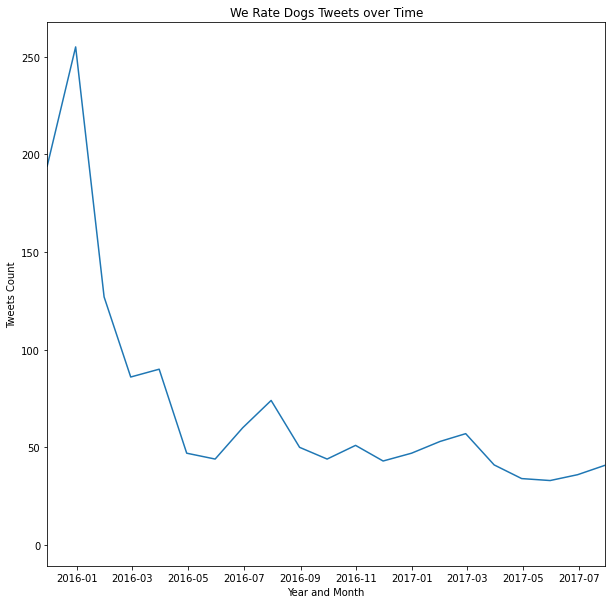

In [239]:
plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

In [240]:
favorites = combined_archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum().reset_index().sort_values('timestamp')[:-1]

C:\Users\easygoing\AppData\Local\Temp\ipykernel_12736\3591732938.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')


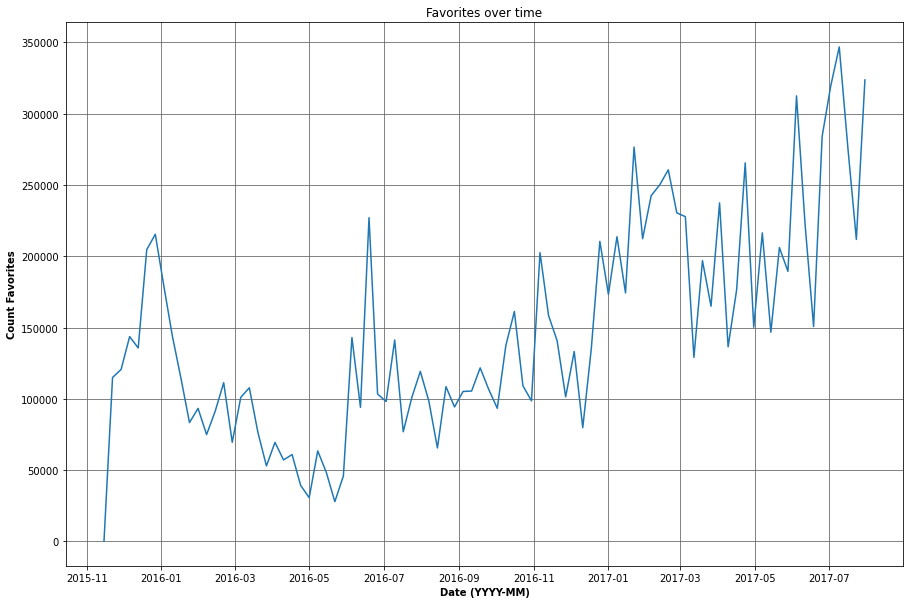

In [241]:
plt.subplots(figsize=(15, 10))
plt.plot(favorites.timestamp, favorites.favorite_count)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Favorites over time')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count Favorites', weight='bold')
plt.savefig('favorites.png');

(-1.2888503924479129, 1.238386914283826, -1.226159584653109, 1.210716406449716)

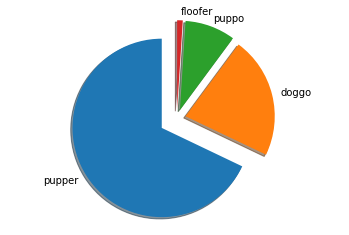

In [242]:
stage_count = list(combined_archive[combined_archive['dog_stages'] != 'None']['dog_stages'].value_counts())[0:4]
stages = combined_archive[combined_archive['dog_stages'] != 'None']['dog_stages'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(stage_count, explode = explode, labels = stages, shadow = True, startangle = 90)
axis1.axis('equal')

### Insights:
1. The number of tweet on the `we rate dogs`decreased over time

2. The number of fevorites increased over the same period

3. The biggest part of dogs poseted are pupper

### Visualization

In [243]:
rr = combined_archive[combined_archive['dog_stages'] != 'None'].groupby(pd.Grouper('dog_stages'))['confidence'].mean()

In [244]:
rr.head()

dog_stages
doggo      0.266778
puppo      0.291668
pupper     0.263157
floofer    0.300443
Name: confidence, dtype: float64

(-1.243770300156192,
 1.1948412964658113,
 -1.1897655779376515,
 1.2580163416757801)

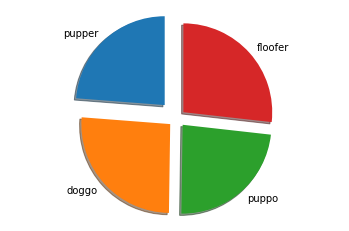

In [245]:
stage_count = list(combined_archive[combined_archive['dog_stages'] != 'None'].groupby(pd.Grouper('dog_stages'))['confidence'].mean())[0:4]
stages = combined_archive[combined_archive['dog_stages'] != 'None']['dog_stages'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(stage_count, explode = explode, labels = stages, shadow = True, startangle = 90)
axis1.axis('equal')